<a href="https://colab.research.google.com/github/asddzxqw/oss2025/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EC%83%9D%EC%A1%B4_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 불러오기


In [ ]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_gender_submission = pd.read_csv('gender_submission.csv')

In [ ]:
# Data Shape and Info
print("Data Shape:", df_train.shape)
print("\nData Info:")
df_train.info()

# Descriptive Statistics
print("\nDescriptive Statistics for Numerical Features:")
display(df_train[['Age', 'Fare', 'Pclass']].describe())

# Missing Values
print("\nMissing Values:")
missing_values = df_train.isnull().sum()
missing_percentage = (missing_values / len(df_train)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
display(missing_df)

Data Shape: (891, 12)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Descriptive Statistics for Numerical Features:


,Age,Fare,Pclass
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,2.308642
std,14.526497,49.693429,0.836071
min,0.420000,0.000000,1.000000
25%,20.125000,7.910400,2.000000
50%,28.000000,14.454200,3.000000
75%,38.000000,31.000000,3.000000
max,80.000000,512.329200,3.000000



Missing Values:


,Missing Values,Percentage
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


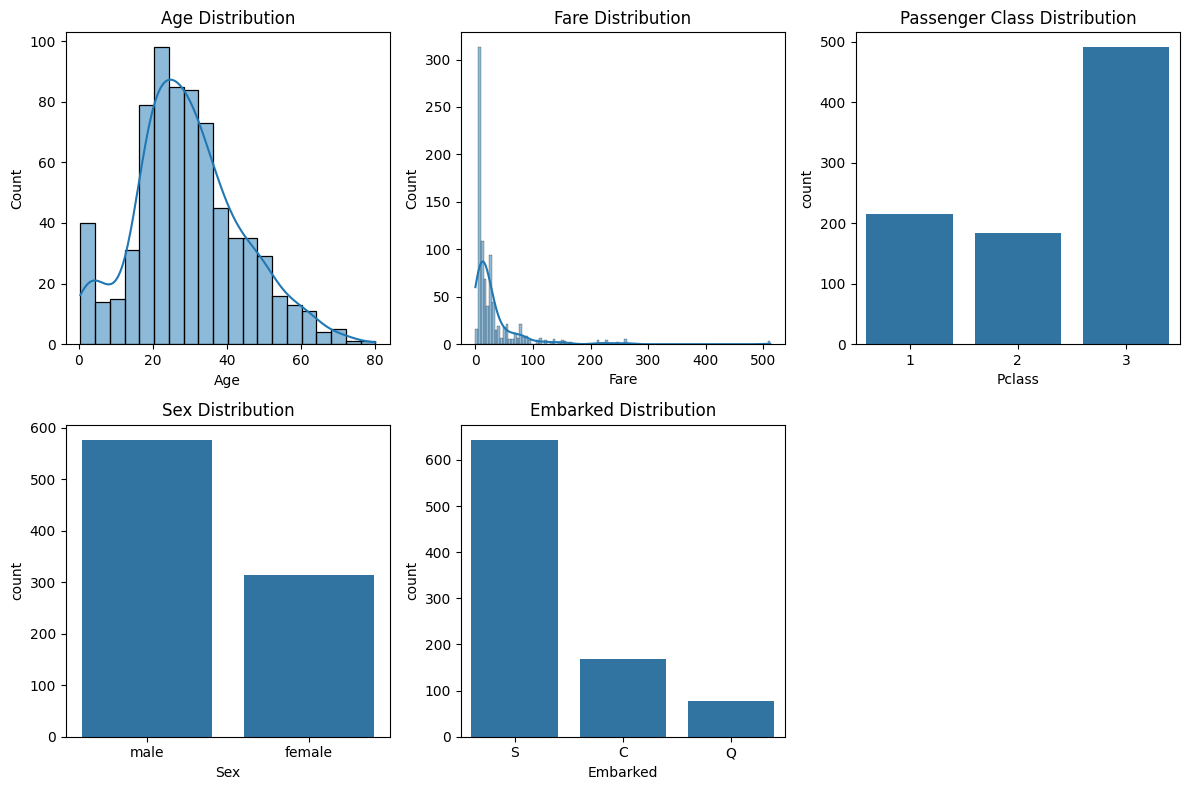

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Distributions
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.histplot(df_train['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(2, 3, 2)
sns.histplot(df_train['Fare'], kde=True)
plt.title('Fare Distribution')

plt.subplot(2, 3, 3)
sns.countplot(x='Pclass', data=df_train)
plt.title('Passenger Class Distribution')

plt.subplot(2, 3, 4)
sns.countplot(x='Sex', data=df_train)
plt.title('Sex Distribution')

plt.subplot(2, 3, 5)
sns.countplot(x='Embarked', data=df_train)
plt.title('Embarked Distribution')

plt.tight_layout()
plt.show()

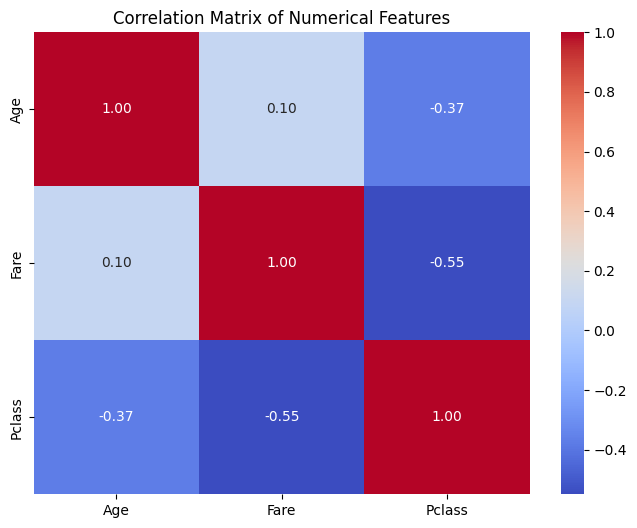

In [ ]:
# Correlation Analysis
plt.figure(figsize=(8, 6))
correlation_matrix = df_train[['Age', 'Fare', 'Pclass']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## 데이터 전처리




In [ ]:
# Fill missing 'Age' values with the median age
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the mode
most_frequent_embarked = df_train['Embarked'].mode()[0]
df_train['Embarked'].fillna(most_frequent_embarked, inplace=True)

# Fill missing 'Fare' values with the median fare
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

# Fill missing 'Cabin' values with 'Unknown'
df_train['Cabin'].fillna('Unknown', inplace=True)
df_test['Cabin'].fillna('Unknown', inplace=True)

<ipython-input-5-804f3a8fc32b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
<ipython-input-5-804f3a8fc32b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
# Fill missing 'Age' values with the median age
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())

# Fill missing 'Embarked' values with the mode
most_frequent_embarked = df_train['Embarked'].mode()[0]
df_train['Embarked'] = df_train['Embarked'].fillna(most_frequent_embarked)

# Fill missing 'Fare' values with the median fare
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

# Fill missing 'Cabin' values with 'Unknown'
df_train['Cabin'] = df_train['Cabin'].fillna('Unknown')
df_test['Cabin'] = df_test['Cabin'].fillna('Unknown')

## 데이터 분석


In [ ]:
# Calculate overall survival rate
overall_survival_rate = df_train['Survived'].mean()
print(f"Overall Survival Rate: {overall_survival_rate:.2f}")

# Calculate survival rate by gender
survival_rate_by_gender = df_train.groupby('Sex')['Survived'].mean()
print("\nSurvival Rate by Gender:")
print(survival_rate_by_gender)

# Calculate survival rate by passenger class
survival_rate_by_class = df_train.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rate by Passenger Class:")
print(survival_rate_by_class)

# Calculate survival rate by age group
bins = [0, 18, 65, float('inf')]
labels = ['Child', 'Adult', 'Senior']
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=bins, labels=labels)
survival_rate_by_age = df_train.groupby('AgeGroup')['Survived'].mean()
print("\nSurvival Rate by Age Group:")
print(survival_rate_by_age)

Overall Survival Rate: 0.38

Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival Rate by Age Group:
AgeGroup
Child     0.503597
Adult     0.364247
Senior    0.125000
Name: Survived, dtype: float64


<ipython-input-7-c4535cb8b255>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age = df_train.groupby('AgeGroup')['Survived'].mean()


In [ ]:
# Analyze the relationship between survival and fare
average_fare_survivors = df_train[df_train['Survived'] == 1]['Fare'].mean()
average_fare_non_survivors = df_train[df_train['Survived'] == 0]['Fare'].mean()

print("\nAverage Fare for Survivors:", average_fare_survivors)
print("Average Fare for Non-Survivors:", average_fare_non_survivors)

# Analyze the relationship between survival and the port of embarkation
survival_rate_by_embarked = df_train.groupby('Embarked')['Survived'].mean()
print("\nSurvival Rate by Embarkation Port:")
print(survival_rate_by_embarked)


Average Fare for Survivors: 48.39540760233918
Average Fare for Non-Survivors: 22.117886885245902

Survival Rate by Embarkation Port:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


## 데이터 시각화


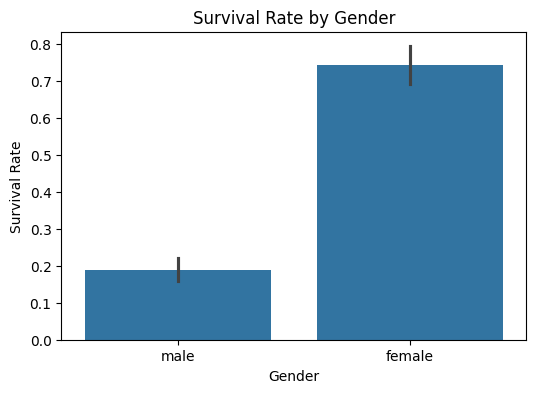

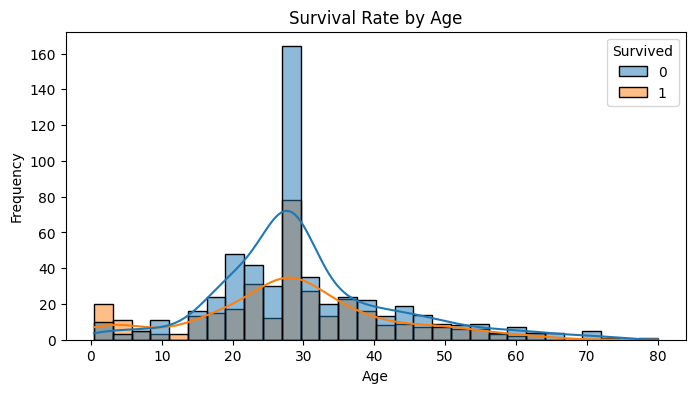

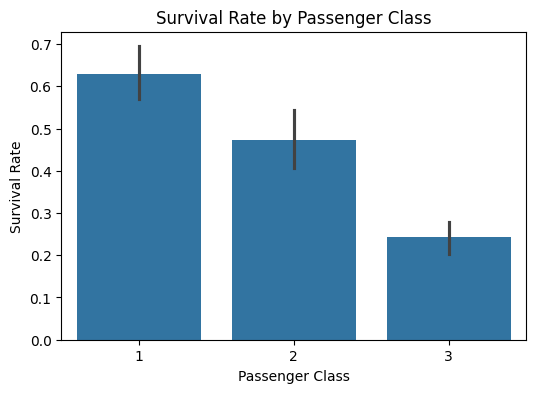

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Gender: Survival Rate Difference
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df_train)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

# 2. Age: Survival Rate
plt.figure(figsize=(8, 4))
sns.histplot(x='Age', hue='Survived', data=df_train, kde=True)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# 3. Passenger Class (Pclass): Survival Rate
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df_train)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

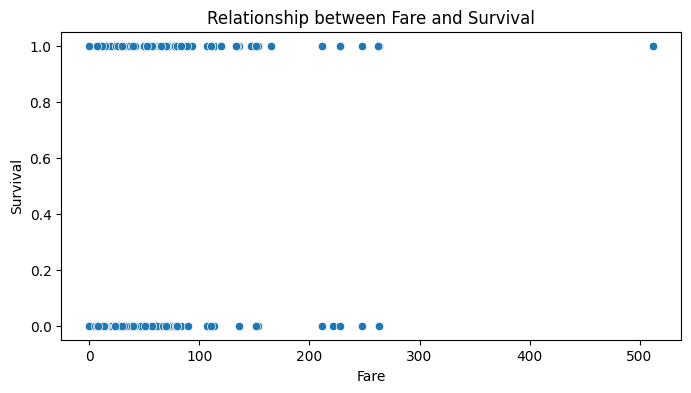

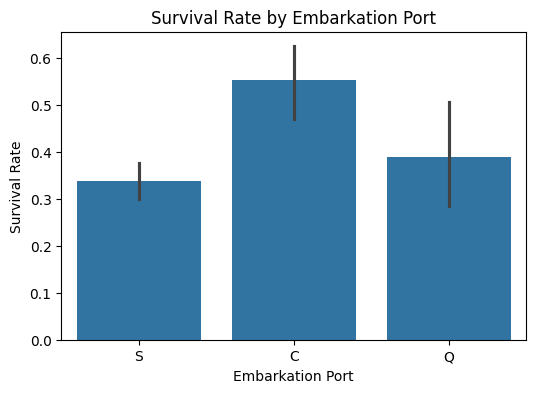

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Fare: Relationship between Survival and Fare
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Fare', y='Survived', data=df_train)
plt.title('Relationship between Fare and Survival')
plt.xlabel('Fare')
plt.ylabel('Survival')
plt.show()

# 5. Embarked: Survival Rate by Embarkation Port
plt.figure(figsize=(6, 4))
sns.barplot(x='Embarked', y='Survived', data=df_train)
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()

## 요약:

## 타이타닉 생존 분석 요약

### 1. 데이터 분석 주요 결과

* **성별:** 여성의 생존율(74%)이 남성(19%)보다 훨씬 높았습니다.
* **객실 등급:** 1등석 승객의 생존율이 가장 높았고(63%), 다음으로 2등석(47%), 3등석(24%) 순이었습니다.
* **나이:** 어린이의 생존율이 가장 높았고(50%), 다음으로 성인(36%), 노인(13%) 순이었습니다.
* **요금:** 생존자들은 비생존자들에 비해 평균적으로 더 높은 요금(48.4)을 지불했습니다. 비생존자들의 평균 요금은 22.1입니다.
* **승선항:** 셰르부르(C)에서 승선한 승객의 생존율이 가장 높았고(55%), 다음으로 퀸스타운(Q)(39%), 사우샘프턴(S)(34%) 순이었습니다.
* **결측값:**  '나이'(19.87%), '객실'(77.10%), '승선항'(0.22%) 열에서 상당한 결측값이 발견되었습니다. 이 값들은 각각 중앙값, 최빈값, "알 수 없음"으로 대체되었습니다.


### 2. 다음 단계

* **특성 엔지니어링:** 생존 예측 모델의 정확도를 향상시킬 수 있는 새로운 특성(예: 가족 규모, 이름에서 추출한 직함)을 생성하는 것을 탐색합니다.
* **모델 구축:** 식별된 주요 특성을 기반으로 생존을 예측하는 머신러닝 모델(예: 로지스틱 회귀, 의사 결정 트리, 랜덤 포레스트)을 개발합니다.
